Bellman-Ford has a worst-case runtime of $\Theta (|V||E|)$, which is not very fast. There is a faster algorithm, which is Dijkstra's Algorithm, but it only works if none of the edge weights are negative.

Dijkstra's Algorithm is very similar to BFS, but with the following changes:

*  After we finishing processing a vertex, BFS then checks the next vertex based on a queue, which is FIFO. Dijkstra instead uses a priority-queue, where the vertex we extract is the unmarked vertex with the lowest cost.
*  BFS marks vertices when they are first seen. Dijkstra instead only marks a vertex when it is extracted from the priority queue.
*  When we check the unmarked neighbors of a vertex $u$, the cost to this new path is $cost[u] + w$, where $w$ is the edge weight (as opposed to $dist[u] + 1$ in BFS). We only update the cost if this new cost is strictly smaller than the old cost.

In [1]:
numVertices = 14

A, B, C, D, E, F, G, H, I, J, K, L, M, N = range (14) # A = 0, B = 1, C = 2, ...

adjlst = [[(B, 2), (J, 3)],           # A
          [(M, 6), (A, 2), (C, 2), (K, 1), (L, 7)],  # B
          [(G, 9), (B, 2)],           # C
          [(N, 1), (F, 3)],           # D
          [(G, 5)],              # E
          [(D, 3), (I, 2)],           # F
          [(H, 3), (C, 9), (L, 2), (E, 5)],     # G
          [(G, 3)],              # H
          [(F, 2)],              # I
          [(A, 3), (L, 1)],           # J
          [(L, 9), (B, 1)],           # K
          [(J, 1), (K, 9), (M, 2), (B, 7), (G, 2)],  # L
          [(L, 2), (B, 6)],           # M
          [(D, 1)]]              # N

# [OPTIONAL] convert index to uppercase letter
def idx2char (idx):
  return chr (ord ('A') + idx)

In [2]:
import heapq

# the value of INFINITY should be larger than the largest path weight
# for example, you can take the biggest edge weight and multiply it by |V|
# Python also has a built-in floating-point number representing infinity
# that you can use as follows:
INFINITY = float ("inf")

def dijkstra (adjlst, start):
  visited = [False] * len (adjlst)
  parent = [False] * len (adjlst)
  cost = [INFINITY] * len (adjlst)
  # do NOT mark the starting vertex as visited
  cost[start] = 0

  # the priority-queue needs to store every vertex AND its
  # current cost
  # and the priority should be based on cost first
  # so each element of the PQ should be of the form (cost, vertex)
  pq = [(0, start)]   # initially, add only starting vertex (with cost 0)

  while len (pq) != 0:
    cst, curr = heapq.heappop (pq)# extract minimum from priority queue
    if visited[curr]:             # if it's already marked, then skip it
      continue

    visited[curr] = True          # mark the vertex when you extract
    for nbr, wgt in adjlst[curr]:   # for a weighted graph, each element in adjlst[curr] is (nbr, wgt)
      if visited[nbr] == False:
        # do not mark nbr over here

        # we should only update if the new cost is an improvement
        if cost[curr] + wgt < cost[nbr]:
          parent[nbr] = curr
          cost[nbr] = cost[curr] + wgt
          heapq.heappush (pq, (cost[nbr], nbr)) # add it to the PQ as well

  print (visited)
  print (cost)
  for i in range (len (parent)):
    if str (parent[i]) != "0" and parent[i] == False:
      print (f"No parent for {idx2char (i)}")
    else:
      print (f"Parent of {idx2char (i)} is {idx2char (parent[i])}")

dijkstra (adjlst, G)

[True, True, True, False, True, False, True, True, False, True, True, True, True, False]
[6, 8, 9, inf, 5, inf, 0, 3, inf, 3, 9, 2, 4, inf]
Parent of A is J
Parent of B is A
Parent of C is G
No parent for D
Parent of E is G
No parent for F
No parent for G
Parent of H is G
No parent for I
Parent of J is L
Parent of K is B
Parent of L is G
Parent of M is L
No parent for N


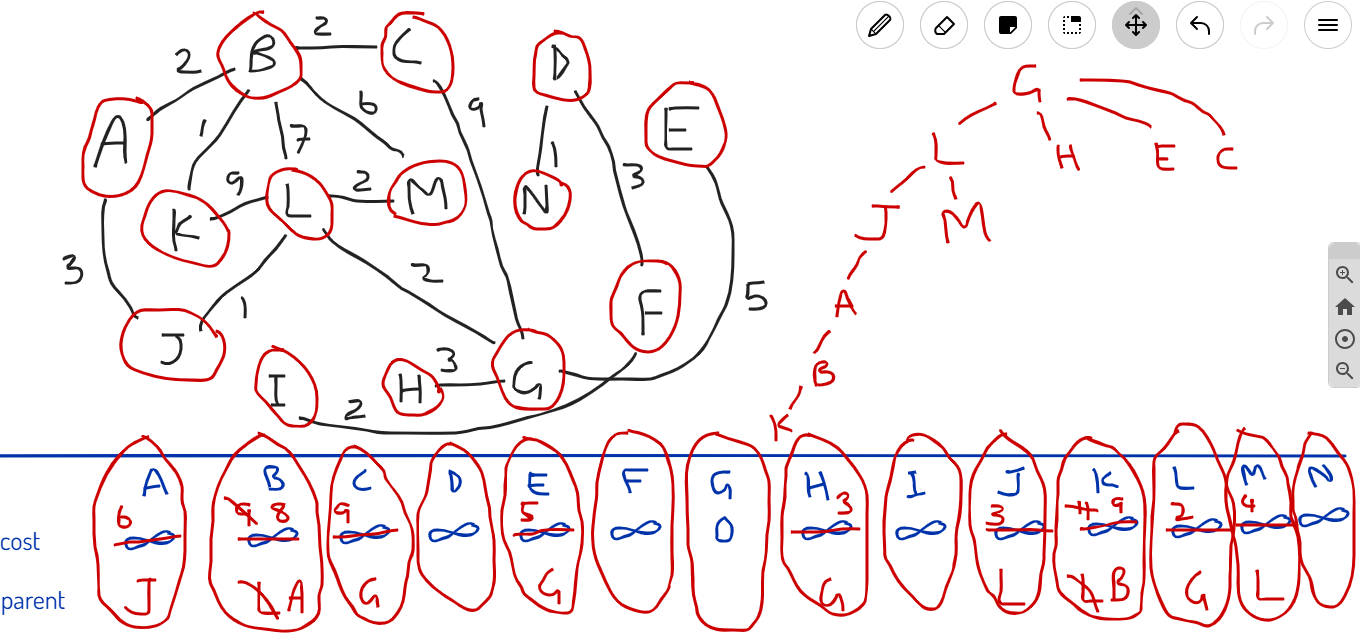

In [ ]:
a = float ("inf")
print (a)
print (29183047285732475 < a)

inf
True


In [3]:
dijkstra (adjlst, L)

[True, True, True, False, True, False, True, True, False, True, True, True, True, False]
[4, 6, 8, inf, 7, inf, 2, 5, inf, 1, 7, 0, 2, inf]
Parent of A is J
Parent of B is A
Parent of C is B
No parent for D
Parent of E is G
No parent for F
Parent of G is L
Parent of H is G
No parent for I
Parent of J is L
Parent of K is B
No parent for L
Parent of M is L
No parent for N


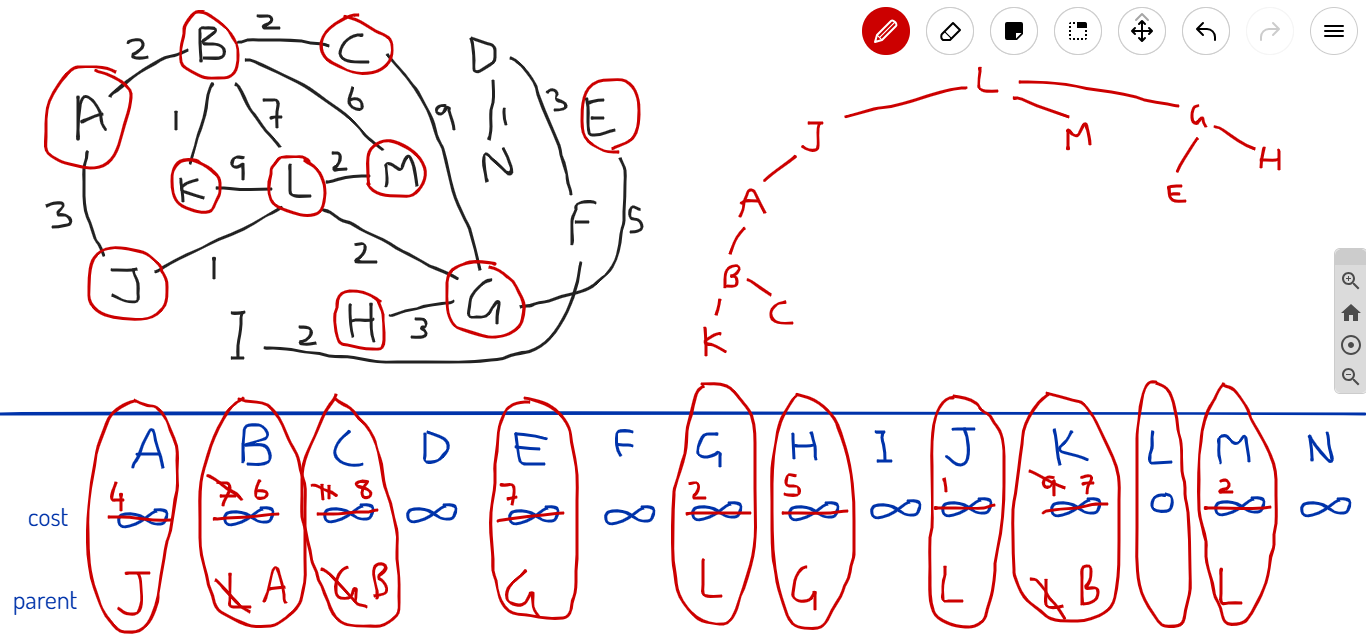